In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import joblib

In [7]:
# Load data
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
# Shape and basic info
df.shape
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [9]:
# Check missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

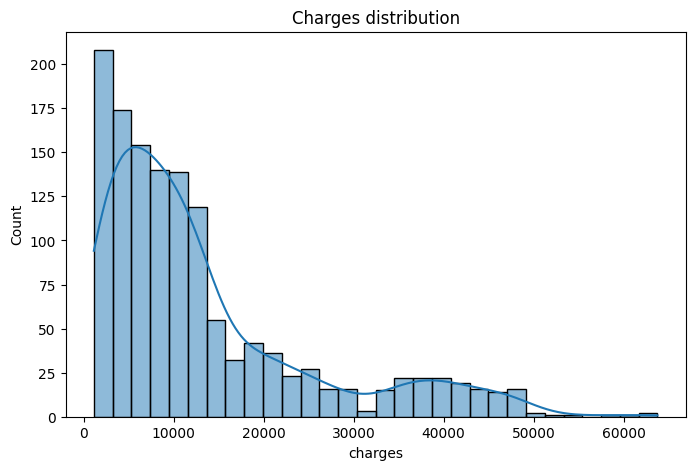

In [10]:
plt.figure(figsize=(8,5))
sns.histplot(df['charges'], kde=True)
plt.title('Charges distribution')
plt.show()

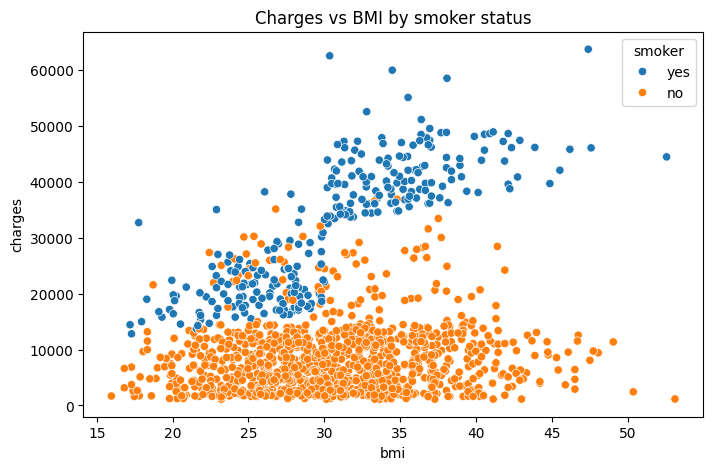

In [11]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df)
plt.title('Charges vs BMI by smoker status')
plt.show()

## Preprocessing
- Encode categorical variables: `sex`, `smoker`, and `region`
- Keep numeric: `age`, `bmi`, `children`
- Target: `charges`

In [12]:
# Create a copy to work on
df2 = df.copy()
# Binary map for sex and smoker
df2['sex'] = df2['sex'].map({'male':0, 'female':1})
df2['smoker'] = df2['smoker'].map({'no':0, 'yes':1})
# One-hot for region
df2 = pd.get_dummies(df2, columns=['region'], drop_first=True)
df2.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,False,False,True
1,18,0,33.770,1,0,1725.55230,False,True,False
2,28,0,33.000,3,0,4449.46200,False,True,False
3,33,0,22.705,0,0,21984.47061,True,False,False
4,32,0,28.880,0,0,3866.85520,True,False,False


In [27]:
# Features and target
X = df2.drop('charges', axis=1)
y = df2['charges']
X.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [28]:
# Train-test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((1070, 8), (268, 8))

In [16]:
# Optionally scale numeric features (not strictly required for LinearRegression but often helpful)
num_cols = ['age','bmi','children']
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [17]:
# Train Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred[:10]

array([ 8969.55027444,  7068.74744287, 36858.41091155,  9454.67850053,
       26973.17345656, 10864.11316424,   170.28084136, 16903.45028662,
        1092.43093614, 11218.34318352])

In [18]:
# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R2:', r2)

MAE: 4181.194473753651
MSE: 33596915.851361476
RMSE: 5796.284659276274
R2: 0.7835929767120722


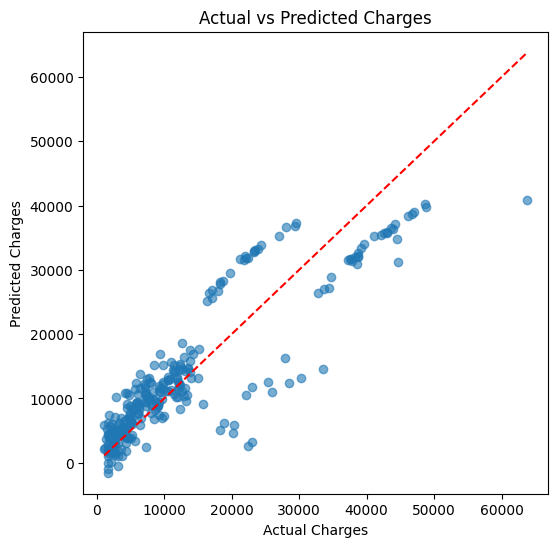

In [19]:
# Scatter plot Actual vs Predicted
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

In [20]:
# Save model and scaler
joblib.dump(model, 'insurance_charges_model.joblib')
joblib.dump(scaler, 'insurance_scaler.joblib')
print('Model and scaler saved')

Model and scaler saved


In [32]:
# Example: load saved model and scaler, predict for a sample patient
import joblib
# Load model and scaler saved earlier
model = joblib.load('insurance_charges_model.joblib')
scaler = joblib.load('insurance_scaler.joblib')
# Construct a sample patient (match feature columns used in training)
sample = {
    'age': 35,
    'sex': 0,            # female=1 if mapping used earlier
    'bmi': 24.0,
    'children': 3,
    'smoker': 1,
    'region_northwest': 0,
    'region_southeast': 0,
    'region_southwest': 0
}
sample_df = pd.DataFrame([sample])
# Scale numeric columns the same way as training
num_cols = ['age','bmi','children']
sample_df[num_cols] = scaler.transform(sample_df[num_cols])
# Predict
pred = model.predict(sample_df)[0]
print(f'Predicted charges for sample patient: {pred:,.2f}')


Predicted charges for sample patient: 30,061.53
